# **TITLE**
****

## **Introduction**

## **Methods and Results**

### **Reading Data from the Web and Cleaning Data**

In [1]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url <- "https://raw.githubusercontent.com/PeterYuLi1204/STAT-201-Project/main/StudentsPerformance_with_headers.csv" 
student_data <- read_csv(url)

student_data_cleaned <- student_data
colnames(student_data_cleaned) <- make.names(colnames(student_data), unique = TRUE)
student_data_cleaned <- student_data_cleaned |>
    mutate(Regular.artistic.or.sports.activity = cut(Regular.artistic.or.sports.activity, 2, c("yes", "no")))

head(student_data_cleaned)

New names:
• `Reading frequency` -> `Reading frequency...19`
• `Reading frequency` -> `Reading frequency...20`
Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STUDENT ID
dbl (32): Student Age, Sex, Graduated high-school type, Scholarship type, Ad...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENT.ID,Student.Age,Sex,Graduated.high.school.type,Scholarship.type,Additional.work,Regular.artistic.or.sports.activity,Do.you.have.a.partner,Total.salary.if.available,Transportation.to.the.university,⋯,Preparation.to.midterm.exams.1,Preparation.to.midterm.exams.2,Taking.notes.in.classes,Listening.in.classes,Discussion.improves.my.interest.and.success.in.the.course,Flip.classroom,Cumulative.grade.point.average.in.the.last.semester...4.00.,Expected.Cumulative.grade.point.average.in.the.graduation...4.00.,COURSE.ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,no,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,no,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,no,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,no,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,no,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,no,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


*Figure 1: table displaying cleaned up dataset*

The data is in tidy format but the numerical values in Regular.artistic.or.sports.activity have been changed to a factor to reflect the represented values. However, our GRADE variable has been left as numerical for calculating means but they represent students' letter grade ranges (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA).

### **Observed Statistics**

In [3]:
activity_means <- student_data_cleaned |>
    group_by(Regular.artistic.or.sports.activity) |>
    summarize(mean_grade = mean(GRADE), standard_deviation = sd(GRADE), n = n())

obs_diff_in_means <- activity_means$mean_grade[1] - activity_means$mean_grade[2]

activity_means
obs_diff_in_means

Regular.artistic.or.sports.activity,mean_grade,standard_deviation,n
<fct>,<dbl>,<dbl>,<int>
yes,3.396552,2.316528,58
no,3.114943,2.120911,87


[1] 0.2816092

*Figure 2: table of mean grade and sample size of the yes and no groups*

Both sample sizes are **sufficiently large (n $\ge$ 30) for the CLT to apply** and the sample mean grade of students that participate in regular artistic or sports activities is **greater** than those who do not. Our observed difference in means is 0.281609195402299 but we will have to conduct a hypothesis test to determine whether this difference is significant.

### **Preliminary Visualization**

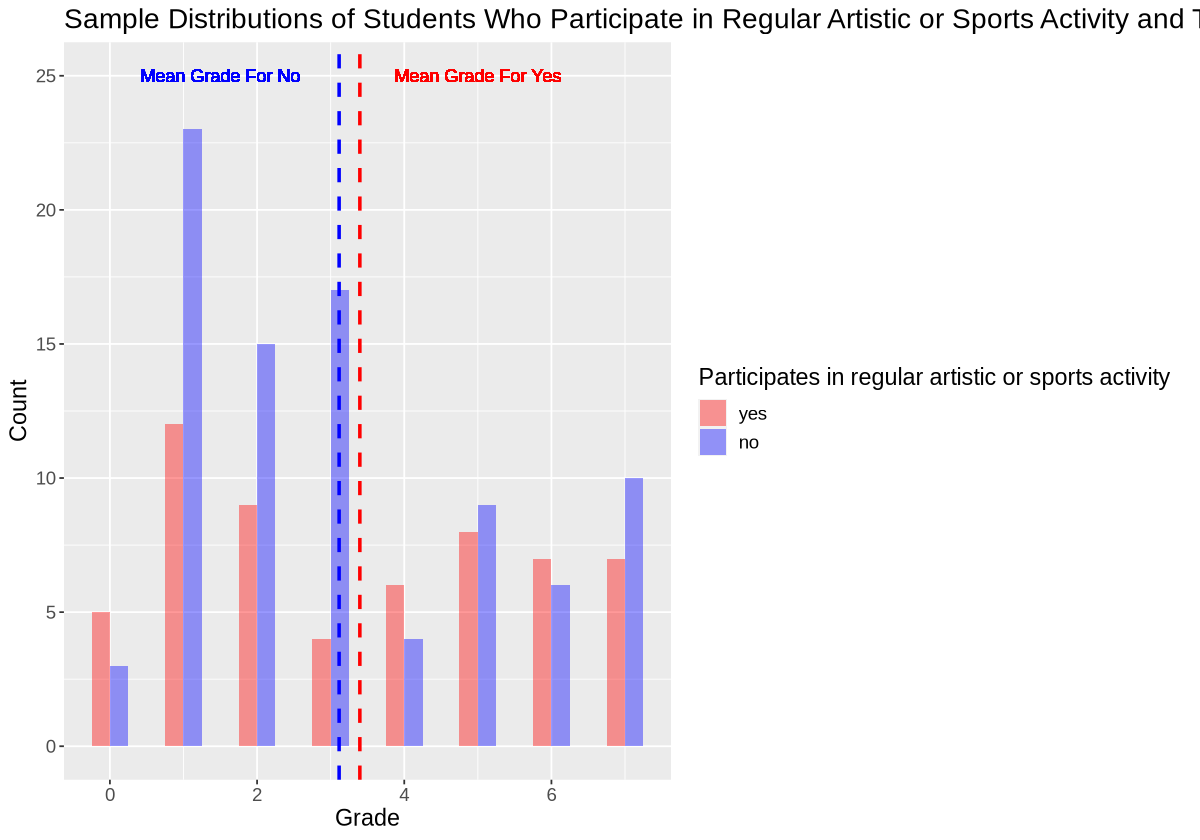

In [4]:
activity_grades <- student_data_cleaned |>
    filter(Regular.artistic.or.sports.activity %in% c("yes", "no")) |>
    select(Regular.artistic.or.sports.activity, GRADE)

options(repr.plot.width=10, repr.plot.height=7)

activity_grades_plot <- activity_grades |>
    ggplot() +
    geom_histogram(aes(x = GRADE, fill = Regular.artistic.or.sports.activity), alpha = 0.4, position = "dodge", binwidth = 0.5) +
    geom_vline(xintercept = activity_means$mean_grade[1], color = "red", linetype = "dashed", linewidth = 1) +
    geom_vline(xintercept = activity_means$mean_grade[2], color = "blue", linetype = "dashed", linewidth = 1) +
    scale_fill_manual(values = c("red", "blue")) +
    labs(fill = "Participates in regular artistic or sports activity", title = "Sample Distributions of Students Who Participate in Regular Artistic or Sports Activity and Those Who Do Not", x = "Grade", y = "Count") +
    geom_text(aes(x = 1.5, y = 25, label = "Mean Grade For No"), color = "blue") +
    geom_text(aes(x = 5, y = 25, label = "Mean Grade For Yes"), color = "red") +
    theme(text = element_text(size = 14))

activity_grades_plot

*Figure 3: combined sample distribution of grades in the yes and no groups and their respective means*

We observe that both samples appear as bimodal and have non-normal distributions but the CLT will still apply for testing a difference in means.

### **Hypothesis Formulation and Significance Level**

Our hypotheses are as formulated below and the chosen significance level is $\alpha = 0.05$.

**Location Parameter (mean):**

$H_{0}: \mu_{yes} - \mu_{no} = 0$

$H_{1}: \mu_{yes} - \mu_{no} > 0$

**Scale Parameter (standard deviation):**

$H_{0}: \sigma_{yes} - \sigma_{no} = 0$

$H_{1}: \sigma_{yes} - \sigma_{no} \ne 0$

Our hypotheses will be 

### **Scale Parameter (Standard Deviation) Analysis**

To evaluate the impact of regular artistic or sports activity on the variability of student grades, we focus on the scale parameter, specifically the standard deviation. Our aim is to determine if there's a significant difference in the variation of grades between students who participate in these activities and those who do not.

**Statistical Test for Scale Parameter**

To test these hypotheses, we'll use an F-test for comparing two variances. This test is appropriate as it is specifically designed to compare the variances of two independent samples. We'll calculate the F-statistic as the ratio of the two sample variances. The assumptions for this test include independence of samples, and that both samples are drawn from normally distributed populations.

Calculating Variances for Each Group:

In [17]:
var_yes <- var(student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "yes",]$GRADE)
var_no <- var(student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "no",]$GRADE)

- var_yes calculates the variance of grades for students who participate in regular artistic or sports activities ("yes" group).

- var_no calculates the variance of grades for students who do not participate in these activities ("no" group).

- The var() function computes the variance of the specified column (GRADE) for each subset of data.

In [18]:
f_statistic <- var_yes / var_no

This step computes the F-statistic, which is the ratio of the two variances. The F-statistic is used to compare the variances and see if they are significantly different.

In [19]:
f_test_result <- var.test(student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "yes",]$GRADE,
                          student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "no",]$GRADE)

f_test_result


	F test to compare two variances

data:  student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "yes", ]$GRADE and student_data_cleaned[student_data_cleaned$Regular.artistic.or.sports.activity == "no", ]$GRADE
F = 1.193, num df = 57, denom df = 86, p-value = 0.4544
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.748740 1.945712
sample estimates:
ratio of variances 
          1.192973 


This line performs the actual F-test using var.test(), comparing the variances of grades between the two groups.
It tests the null hypothesis that the two variances are equal against the alternative that they are not equal.

**Results Interpretation**

The F-test for comparing variances between students engaged in regular artistic or sports activities and those who are not yielded an F-value of 1.193, with a p-value of 0.4544. Since this p-value exceeds our significance level of 0.05, we fail to reject the null hypothesis. This implies there is no statistically significant difference in the variance of grades between the two groups.

### **Infer Method**

Firstly, we will utilize the infer package above to create 1000 permutation resamples of our initial sample and calculate the difference in means between the yes and no groups. Importantly, we assume that the mean grade is independent from which group the students are in and use a set seed for reproducibility.

In [6]:
set.seed(202312)

null_diff_in_means <- 
    student_data_cleaned %>% 
    specify(formula = GRADE ~ Regular.artistic.or.sports.activity) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("yes", "no"))

head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.1379310
2,0.3390805
3,-0.4367816
4,0.3390805
5,0.3390805
6,-0.8678161


*Figure 4: table of permutation resamples and calculated differences in mean grade*

# `**WORK IN PROGRESS**`

In [7]:
infer_ci <- null_diff_in_means |>
    get_ci(0.95, type = "percentile")

infer_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.7241379,0.7988506


In [8]:
infer_p_value <- null_diff_in_means |>
    get_p_value(obs_stat = obs_diff_in_means, direction = "greater")

infer_p_value

p_value
<dbl>
0.25


### **Asymptotic Method**

Setting up Z-test statistic

In [9]:
yes_standard_error <- activity_means$standard_deviation[1]^2 / activity_means$n[1]
no_standard_error <- activity_means$standard_deviation[2]^2 / activity_means$n[2]
diff_in_means_z_stat <- (activity_means$mean_grade[1] - activity_means$mean_grade[2]) / sqrt(yes_standard_error + no_standard_error)

asymptotic_p_value <- pnorm(diff_in_means_z_stat, lower.tail = FALSE)

asymptotic_p_value

[1] 0.2291885

In [10]:
asymptotic_ci <- tibble(lower = qnorm(0.025, mean = 0, sd = sqrt(yes_standard_error + no_standard_error)),
                   upper = qnorm(0.975, mean = 0, sd = sqrt(yes_standard_error + no_standard_error)))
asymptotic_ci

lower,upper
<dbl>,<dbl>
-0.7443391,0.7443391


## **Discussion**

## **References**